# 主成分分析（Principal Component Analysis）

### 2組の数値８個のデータを作って、第一主成分をもとめる

Calculate 1st Principal Component using a test dataset

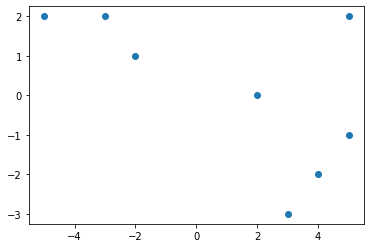

,0,1
0,-5,2
1,-2,1
2,2,0
3,4,-2
4,5,-1
5,-3,2
6,3,-3
7,5,2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data0=[[-5,2],[-2,1],[2,0],[4,-2],[5,-1],[-3,2],[3,-3],[5,2]]
data0=np.array(data0)
plt.scatter(data0[:,0],data0[:,1])
plt.show()

df=pd.DataFrame(data0)
df

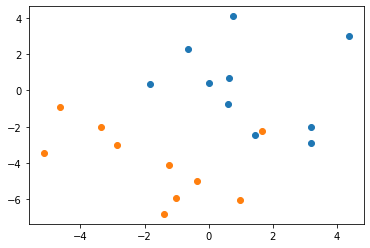

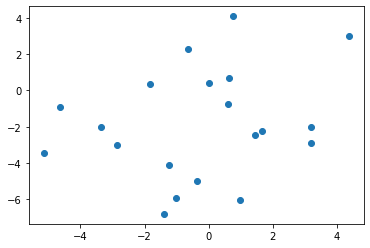

In [2]:
import numpy as np
# np.random.normal()は、平均loc、標準偏差scaleの正規分布に従う乱数を返す。
x=np.random.normal(1,2,(2,10))
y=np.random.normal(-2,2,(2,10))
plt.scatter(x[0],x[1])
plt.scatter(y[0],y[1])
plt.show()
z=np.hstack((x,y))
plt.scatter(z[0],z[1])
data=z

In [7]:
df=pd.read_excel('testdat.xlsx')
data=np.array((df['x1'],df['x2']))


array([ 1.34536,  1.60766,  2.47402, -0.993  ,  4.13782, -2.3125 ,
        2.12943,  0.29949, -0.0528 ,  3.03482, -2.38   , -0.376  ,
       -0.7576 , -1.445  , -2.8229 , -1.9756 , -2.3888 , -0.4291 ,
       -1.1383 , -0.9443 ])

分散共分散行列をもとめて、固有値、固有ベクトルを計算する。

Firstly, we calculate variance covariance matrix and then its eigenvalues and eigenvectors.

分散共分散行列 variance-covariance matrix 
[[3.98836461 2.12351884]
 [2.12351884 5.1323994 ]]


固有値 eigenvalue
[2.36116937 6.75959463]


固有ベクトル eigenvector 
[[-0.7937572  -0.60823474]
 [ 0.60823474 -0.7937572 ]]


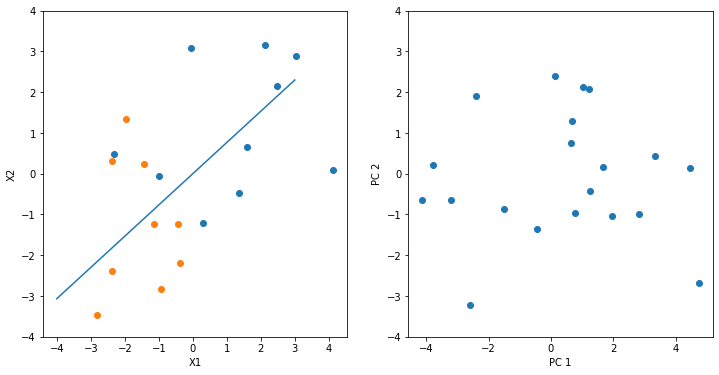

In [68]:
mat_cov=np.cov(data)
print("分散共分散行列 variance-covariance matrix \n{}".format(mat_cov))
print("\n")
eig_value, eig_vector = np.linalg.eig(mat_cov)
print("固有値 eigenvalue\n{}".format(eig_value))
print("\n")
print("固有ベクトル eigenvector \n{}".format(eig_vector))
x=np.arange(-4,4,1)
pc1=np.dot(data.T,eig_vector.T[1])
pc2=np.dot(data.T,eig_vector.T[0])

fig,ax=plt.subplots(ncols=2,figsize=(12,6))
ax[0].scatter(data[0][:10],data[1][:10])
ax[0].scatter(data[0][10:],data[1][10:])
ax[0].plot(x,x/eig_vector.T[1][1]*eig_vector.T[1][0])
ax[0].set_ylim(-4,4)
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[1].scatter(pc1,pc2)
ax[1].set_ylim(-4,4)
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')

plt.show()     

それぞれのデータの第一主成分に対するスコアを内積で計算する

inner products of each data by with 1st PC  eigenvector gives 1st PC 'Score'. 

In [70]:
eig_vector[0],eig_value[0]

(array([-0.7937572 , -0.60823474]), 2.3611693743501627)

,pc1,pc2
固有値,6.759595,2.361169


,pc1,pc2
0,0.608235,0.793757
1,0.793757,-0.608235


,pc1,pc2
寄与率,0.741122,0.258878


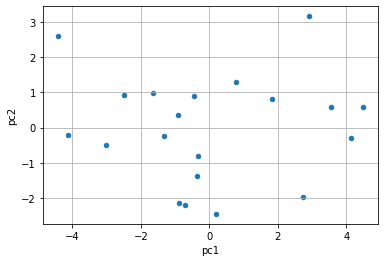

In [81]:
from sklearn.decomposition import PCA   #主成分分析器
from sklearn.preprocessing import StandardScaler

pca = PCA()  # Class 関数の呼び出し
pca.fit(data.T)
pca_cor = pca.transform(data.T) # データを主成分空間に写像

#eigen values　（固有値）
eig = pd.DataFrame(pca.explained_variance_, index=['pc1','pc2'], columns=['固有値'])
display(eig.T)

# eigenvectors　（固有ベクトル）
eig_vec = pd.DataFrame(pca.components_.T, columns = ['pc1','pc2'])
display(eig_vec)

# proportion of the variance　(寄与率）
pv = pd.DataFrame(pca.explained_variance_ratio_, index=['pc1','pc2'], columns=['寄与率'])
display(pv.T)

# score plots
cor = pd.DataFrame(pca_cor, columns=['pc1','pc2'])
cor.plot(x='pc1',y='pc2',kind='scatter', grid=True, legend=True)
plt.show()



In [77]:
cor

,PC1,PC2
0,0.768860,1.293944
1,1.837197,0.805761
2,3.546678,0.587298
3,-0.323526,-0.814928
4,2.923337,3.161055
5,-0.697661,-2.190586
6,4.125327,-0.290230
7,-0.442272,0.904383
8,2.746798,-1.983142
9,4.471490,0.585153


###  celluloseの面間隔のデータを読み込んで同じ操作をやってみる。データは４次元

Next we extend above process to see Cellulose d-spacings data. Now data has 4 variables.

In [ ]:
# load data from excel file エクセルファイルからデータを読む
import pandas as pd

df = pd.read_excel('wada_MG1995_xraydata.xlsx', index_col=0)
df.head(10)

In [ ]:
# 分散共分散行列　（variance-covariance matrix）
import numpy as np
df.cov()

In [ ]:
# 固有値と固有ベクトル　eigenvalue and eigen vectors
res=df.cov()
# 
a_eig = np.linalg.eig(res)
# 固有値を表示　eigenvalue
print("固有値 eigenvalues {}\n".format(a_eig[0]))
# 固有ベクトルを表示 eigenvector
print("固有ベクトル eigenvectors \n{}".format(a_eig[1]))

In [ ]:
# 第一主成分から成分まで計算　score of 1st to 3rd principal components
pc1=np.dot(df.iloc[:,2:],a_eig[1][:,0])
pc2=np.dot(df.iloc[:,2:],a_eig[1][:,1])
pc3=np.dot(df.iloc[:,2:],a_eig[1][:,2])
df['pc1']=pc1
df['pc2']=pc2
df['pc3']=pc3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df,hue='mark',vars=['pc1', 'pc2'])
plt.show()

## すべて scikit-learn でやってみる

### 2組の数値８個のデータを作って、２次元の平面にプロットする。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data=[[-5,2],[-2,1],[2,0],[4,-2],[5,-1],[-3,2],[3,-3],[5,2]]
data=np.array(data)
df=pd.DataFrame(data)
plt.scatter(data[:,0],data[:,1])
plt.show()
df

In [ ]:
# 行列の標準化
# 標準化してない
from sklearn.decomposition import PCA   #主成分分析器
from sklearn.preprocessing import StandardScaler


#主成分分析の実行
pca = PCA()
pca.fit(df)
# データを主成分空間に写像
pca_cor = pca.transform(df)

# 固有ベクトルのマトリックス表示
eig_vec = pd.DataFrame(pca.components_.T, index = df.columns, \
                          columns = ["PC{}".format(x + 1) for x in range(len(df.columns))])
display(eig_vec)

# 固有値
eig = pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(df.columns))], columns=['固有値']).T
display(eig)

# Rによるソースコードだと、固有値（分散）ではなく標準偏差を求めている。
# 主成分の標準偏差
dv = np.sqrt(eig)
dv = dv.rename(index = {'固有値':'主成分の標準偏差'})
display(dv)

# 寄与率
ev = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(df.columns))], columns=['寄与率']).T
display(ev)

# 累積寄与率
t_ev = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), index=["PC{}".format(x + 1) for x in range(len(df.columns))], columns=['累積寄与率']).T
display(t_ev)

# 主成分得点
print('主成分得点')
cor = pd.DataFrame(pca_cor, columns=["PC{}".format(x + 1) for x in range(len(df.columns))])
display(cor)


###  celluloseの面間隔のデータを読み込んで同じ操作をやってみる。データは４次元

In [ ]:
# load data from excel file エクセルファイルからデータを読む
import pandas as pd

df = pd.read_excel('wada_MG1995_xraydata.xlsx', index_col=0)
df.head(10)

In [ ]:
#主成分分析の実行
pca = PCA()
pca.fit(df.iloc[:,2:])
# データを主成分空間に写像
pca_cor = pca.transform(df.iloc[:,2:])

#eigen values　（固有値）
eig = pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) \
                                                   for x in range(len(df.iloc[:,2:].columns))], columns=['固有値']).T
display(eig)

# eigenvectors　（固有ベクトル）
eig_vec = pd.DataFrame(pca.components_.T, index = df.iloc[:,2:].columns, \
                          columns = ["PC{}".format(x + 1) for x in range(len(df.iloc[:,2:].columns))])
display(eig_vec)

# proportion of the variance　(寄与率）
pv = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1)\
                                                        for x in range(len(df.iloc[:,2:].columns))], columns=['寄与率']).T
display(pv)

# score plots
cor = pd.DataFrame(pca_cor, columns=["PC{}".format(x + 1) for x in range(len(df.iloc[:,2:].T))])
#display(cor)

cor['mark']=df['mark'].values
import seaborn as sns
sns.pairplot(cor, hue='mark')  # 1,2 components only

plt.show()

